In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
print ('labels:',labels)
print ('features:', features)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

labels: ['malignant' 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [2]:
print ('\nDecision Tree')
max_depth = 3
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))


Decision Tree
train accuracy= 97.653%
test accuracy= 95.105%


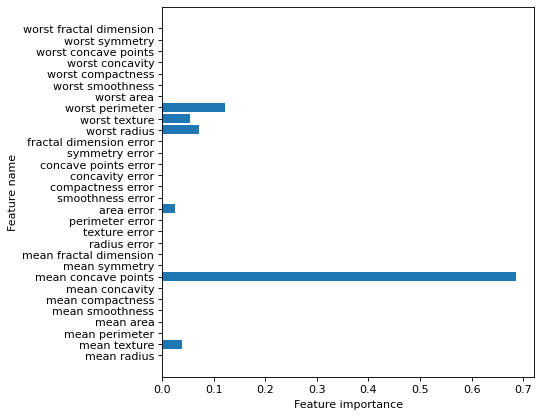

In [3]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)
    
plot_feature_importances(clf, features)

In [4]:
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True)

'Source.gv.pdf'

In [5]:
from sklearn.ensemble import RandomForestClassifier
print ('\Random Forest')

clf = RandomForestClassifier().fit (X_train, y_train)
clf.score (X_train, y_train)
n_estimators_list= [5,10,20]
max_features_list= list(np.arange(1, X_train.shape[1]+1))

for i in range (len(n_estimators_list)): 
    for j in range (len(max_features_list)):
        index = len(max_features_list)*i+j           
        clf = RandomForestClassifier(
            random_state=10,
            n_estimators= n_estimators_list[i],
            max_features=max_features_list[j],        
        ).fit(X_train, y_train)
        accuracy_train = clf.score (X_train, y_train)
        accuracy_test = clf.score (X_test, y_test)
        print ('n_estimators= {}, max_features = {}, accuracy_train = {:.3%}, accuracy_test = {:.3%}'.format (
            n_estimators_list[i],max_features_list[j], accuracy_train, accuracy_test))

print ('Comparing  to desicion tree clf')
max_depth = 3
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

\Random Forest
n_estimators= 5, max_features = 1, accuracy_train = 99.296%, accuracy_test = 94.406%
n_estimators= 5, max_features = 2, accuracy_train = 99.531%, accuracy_test = 97.203%
n_estimators= 5, max_features = 3, accuracy_train = 99.061%, accuracy_test = 95.804%
n_estimators= 5, max_features = 4, accuracy_train = 99.531%, accuracy_test = 97.203%
n_estimators= 5, max_features = 5, accuracy_train = 99.296%, accuracy_test = 97.902%
n_estimators= 5, max_features = 6, accuracy_train = 99.061%, accuracy_test = 95.105%
n_estimators= 5, max_features = 7, accuracy_train = 99.531%, accuracy_test = 94.406%
n_estimators= 5, max_features = 8, accuracy_train = 98.826%, accuracy_test = 96.503%
n_estimators= 5, max_features = 9, accuracy_train = 99.531%, accuracy_test = 94.406%
n_estimators= 5, max_features = 10, accuracy_train = 99.296%, accuracy_test = 95.105%
n_estimators= 5, max_features = 11, accuracy_train = 99.296%, accuracy_test = 96.503%
n_estimators= 5, max_features = 12, accuracy_tra

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=3).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 98.826%
test accuracy= 95.804%


In [7]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [8]:
from xgboost import XGBClassifier
print ('\nXGBClassifier')
clf = XGBClassifier(use_label_encoder=False, eval_metric= 'logloss',reg_lambda= 100 , max_depth =7)
clf.fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))


XGBClassifier
train accuracy= 99.531%
test accuracy= 97.902%
